In [2]:
#referencia https://medium.com/towards-artificial-intelligence/multi-class-text-classification-using-pyspark-mllib-doc2vec-dbfcee5b39f2
import findspark
findspark.init() 
from pyspark.sql import SparkSession
import os


MAX_MEMORY = "8g"
spark = SparkSession.builder \
                    .master("local") \
                    .appName('va_repositorio')\
                    .config("spark.executor.memory", MAX_MEMORY) \
                    .config("spark.driver.memory", MAX_MEMORY) \
                    .config("spark.jars", "E:\\va\\driverdb\\postgresql-42.2.5.jre6") \
                    .getOrCreate()

In [103]:
tabla="proyecto.view_clase_va"
df  = spark.read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://localhost:5432/va") \
    .option("dbtable", tabla) \
    .option("user", "postgres") \
    .option("password", "david") \
    .option("driver", "org.postgresql.Driver") \
    .load()
df.printSchema()

root
 |-- periodo: string (nullable = true)
 |-- estu_mcpio_reside: string (nullable = true)
 |-- estu_genero: string (nullable = true)
 |-- estu_estadocivil: string (nullable = true)
 |-- estu_etnia: string (nullable = true)
 |-- estu_limita_motriz: string (nullable = true)
 |-- estu_limita_invidente: string (nullable = true)
 |-- estu_limita_sordoconinterprete: string (nullable = true)
 |-- estu_limita_sordosininterprete: string (nullable = true)
 |-- estu_limita_sordoceguera: string (nullable = true)
 |-- estu_porcentajecreditosaprob: string (nullable = true)
 |-- estu_valormatriculauniversidad: string (nullable = true)
 |-- estu_pagomatriculabeca: string (nullable = true)
 |-- estu_pagomatriculacredito: string (nullable = true)
 |-- estu_pagomatriculapadres: string (nullable = true)
 |-- estu_pagomatriculapropio: string (nullable = true)
 |-- estu_tomo_cursopreparacion: string (nullable = true)
 |-- estu_cursodocentesies: string (nullable = true)
 |-- estu_cursoiesapoyoexterno: str

In [104]:
df_pan=df.toPandas()

In [105]:
Y=df_pan['clase_va_lectura_critica']
X=df_pan.drop(columns=['estu_consecutivo','estu_nse_ies','estu_limita_motriz','periodo',
                       'estu_limita_invidente','estu_limita_sordoconinterprete','estu_limita_sordosininterprete',                       
                       'estu_limita_sordoceguera','inst_origen','estu_privado_libertad','clase_va_lectura_critica',
                       'clase_va_razonamiento_cuantitativo','clase_va_competencias_ciudadanas','clase_va_ingles'])

In [107]:
import pandas as pd
import matplotlib.pyplot as pit

X_dummies=pd.get_dummies(X,drop_first=True)
X_dummies.drop(columns=[
'fami_tienehornomicroogas_no_aplica',
'fami_tienemotocicleta_no_aplica',
'estu_nse_individual_no_aplica',
'estu_horassemanatrabaja_no_aplica',
'fami_tieneconsolavideojuegos_no_aplica',
'estu_pagomatriculabeca_no_aplica',
'estu_pagomatriculacredito_no_aplica',
'estu_pagomatriculapropio_no_aplica',
'estu_tiporemuneracion_no_aplica',
'fami_tieneinternet_no_aplica',
'estu_pagomatriculapadres_no_aplica',
'estu_etnia_no_aplica',
'fami_hogaractual_no_aplica',
'fami_cabezafamilia_no_aplica',
'estu_valormatriculauniversidad_no_aplica',
'fami_educacionmadre_no_aplica',
'fami_tienecomputador_no_aplica',
'fami_educacionpadre_no_aplica',
'fami_tienelavadora_no_aplica',
'fami_tieneautomovil_no_aplica',
'fami_tiene_serviciotv_no_aplica',
'fami_ocupacionpadre_no_aplica',
'fami_ocupacionmadre_no_aplica',
'estu_estadocivil_no_aplica',
'estu_simulacrotipoicfes_no_aplica',
'estu_actividadrefuerzoareas_no_aplica',
'estu_actividadrefuerzogeneric_no_aplica',
'estu_tomo_cursopreparacion_no_aplica',
'estu_trabaja_actualmente_no_aplica',
'fami_pisos_hogar_no_aplica',
'fami_tiene_microondas_no_aplica',
'fami_tiene_horno_no_aplica',
'fami_tiene_dvd_no_aplica',
'fami_telefono_no_aplica',
'fami_ingreso_fmiliar_mensual_no_aplica',
'fami_tiene_nevera_no_aplica',
'fami_tiene_celular_no_aplica'],inplace=True)

In [83]:
#X_dummies.to_excel(".\\correlaciones.xlsx")

In [108]:
X_dummies.head()

,anio_preparacion,estu_mcpio_reside_acacias,estu_mcpio_reside_alban,estu_mcpio_reside_aldana,estu_mcpio_reside_ancuya,estu_mcpio_reside_arboleda,estu_mcpio_reside_armenia,estu_mcpio_reside_barranquilla,estu_mcpio_reside_belen,estu_mcpio_reside_bogota_d.c.,...,gruporeferencia_tecnico_en_ciencias_agropecuarias,gruporeferencia_tecnologico_en_salud,gruporeferencia_tecnologico_en_tic,estu_nse_individual_2,estu_nse_individual_3,estu_nse_individual_4,estu_nse_individual_nse1,estu_nse_individual_nse2,estu_nse_individual_nse3,estu_nse_individual_nse4
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dummies, 
                                                    Y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)
# Show the results of the split
print("Total ejemplos train {}.".format(X_train.shape[0]))
print("Total ejemplos test {}.".format(X_test.shape[0]))

print("Valor Agregado train:",y_train[y_train==1].count())
print("No Valor Agregado train:",y_train[y_train==0].count())

print("Valor Agregado test:",y_test[y_test==1].count())
print("No Valor Agregado test",y_test[y_test==0].count())


Total ejemplos train 3595.
Total ejemplos test 1542.
Valor Agregado train: 2263
No Valor Agregado train: 1332
Valor Agregado test: 977
No Valor Agregado test 565


In [110]:
from sklearn import tree

# Crear Arbol de decision con profundidad = 4
modelo1 = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_leaf=10,
                                            max_depth = 4
                                           )
modelo1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10)

In [111]:
print(modelo1.get_depth())
print(modelo1.get_n_leaves())

4
15


In [112]:
# Crear Arbol de decision con profundidad = 10
modelo2 = tree.DecisionTreeClassifier(criterion='entropy',
                                            #min_samples_split=100,
                                            #min_samples_leaf=10,
                                            max_depth = 10
                                           )
modelo2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [113]:
print(modelo2.get_depth())
print(modelo2.get_n_leaves())

10
166


In [114]:
# Crear Arbol de decision con profundidad = 4
modelo3 = tree.DecisionTreeClassifier(criterion='entropy',
                                             ccp_alpha=0.01
      )
modelo3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy')

In [115]:
print(modelo3.get_depth())

4


In [116]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, balanced_accuracy_score,f1_score


def _score_func(estimator, X, y):
    y_pred_test = estimator.predict(X)
    return balanced_accuracy_score(y, y_pred_test)

class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold,scoring=_score_func)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.balanced_accuracy_score(Y, self.predictions)))
from sklearn.model_selection import GridSearchCV

In [117]:
%%time
gb = Class_Fit(clf = tree.DecisionTreeClassifier)
param_grid = {
             'criterion':['entropy'],
             'ccp_alpha':[0,0.0025,0.0050,0.0075,0.008,0.0085,0.01,0.05],
             'max_depth':[3,4,5,6,7,8,9,10,15,20],
             'min_samples_split':[10,20,30,40,50,60,70,80,90,100],
             'max_leaf_nodes':[3,4,5,6,7,8,9,10,20]
             }

gb.grid_search(parameters = param_grid, Kfold = 10)
gb.grid_fit(X = X_train, Y = y_train)

print("Parámetros árbol:",gb.grid.best_params_)
mejor_arbol=gb.grid.best_estimator_

Parámetros árbol: {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_split': 10}
Wall time: 40min 25s


In [118]:
params=  {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_split': 10}
modelo4=  tree.DecisionTreeClassifier(**params)
modelo4.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=4,
                       max_leaf_nodes=5, min_samples_split=10)

In [119]:
gb.grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 0.0025, 0.005, 0.0075, 0.008, 0.0085,
                                       0.01, 0.05],
                         'criterion': ['entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
                         'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10, 20],
                         'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80,
                                               90, 100]},
             scoring=<function _score_func at 0x000001D6CAC0E040>)

In [120]:
print(modelo4.get_depth())
print(modelo4.get_n_leaves())

4
5


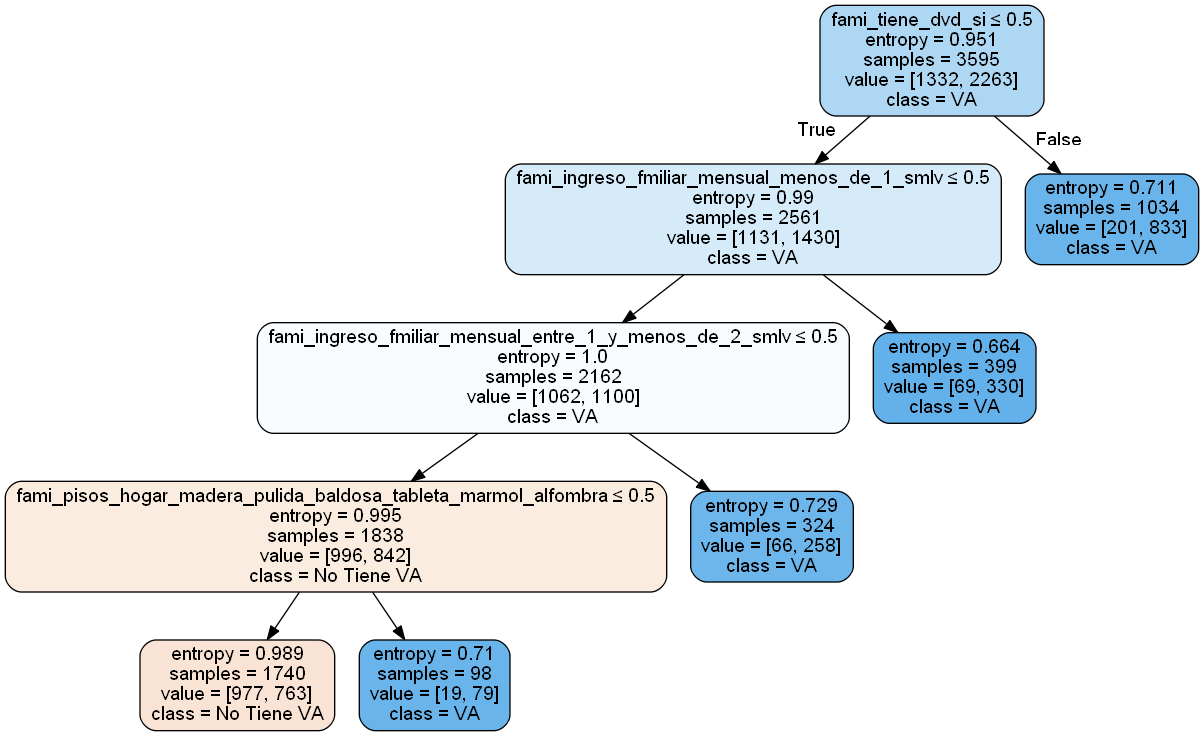

In [121]:
import os
from six import StringIO 
#conda install -c conda-forge pydotplus
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

#https://graphviz.org/download/
#conda install -c anaconda graphviz
#conda install python-graphviz
#pip install graphviz
#pip install pydotplus
#from sklearn.externals.six import StringIO 
# from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 

dot_data = StringIO()

feature_cols=X_train.columns
export_graphviz(modelo4, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['No Tiene VA','VA'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('prueba.png')
Image(graph.create_png())

In [122]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,classification_report,balanced_accuracy_score


def eval_model(testData,trainingData,y_test,y_train,model):
    predictions_test = model.predict(testData)
    predictions_train = model.predict(trainingData)
    # Select (prediction, true label) and compute test error
    print("accuracy test:",accuracy_score(y_test, predictions_test))
    print("accuracy train:",accuracy_score(y_train, predictions_train))
    
    print("Balanced_accuracy test:",balanced_accuracy_score(y_test, predictions_test))
    print("Balanced_accuracy train:",balanced_accuracy_score(y_train, predictions_train))
    
    print(classification_report(y_test,predictions_test))
      
    return (balanced_accuracy_score(y_test, predictions_test))
print("_________________________________________")
print("Modelo 1")
eval_model(X_test,X_train,y_test,y_train,modelo1)
print("_________________________________________")
print("Modelo 2")
eval_model(X_test,X_train,y_test,y_train,modelo2)
print("_________________________________________")
print("Modelo 3")
eval_model(X_test,X_train,y_test,y_train,modelo3)
print("_________________________________________")
print("Modelo 4")
eval_model(X_test,X_train,y_test,y_train,modelo4)
print("_________________________________________")

_________________________________________
Modelo 1
accuracy test: 0.685473411154345
accuracy train: 0.6898470097357441
Balanced_accuracy test: 0.7017844041267742
Balanced_accuracy train: 0.7033015118521084
              precision    recall  f1-score   support

           0       0.55      0.76      0.64       565
           1       0.82      0.64      0.72       977

    accuracy                           0.69      1542
   macro avg       0.69      0.70      0.68      1542
weighted avg       0.72      0.69      0.69      1542

_________________________________________
Modelo 2
accuracy test: 0.7036316472114138
accuracy train: 0.7783031988873436
Balanced_accuracy test: 0.6948424380213947
Balanced_accuracy train: 0.7752609547240568
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       565
           1       0.79      0.73      0.76       977

    accuracy                           0.70      1542
   macro avg       0.69      0.69      0.6